<div style="border:solid green 2px; padding: 20px">
    
Настя, привет! Меня зовут Бунакова Влада. Если не возражаешь, предлагаю общаться на «ты» :)

Ниже в файле ты найдешь мои комментарии: <font color='green'>зеленый цвет — «все отлично»; </font> <font color='orange'>желтый — «хорошо, но можно лучше (один-два таких замечаний допустимы, но если их больше — придется исправлять)»; </font> <font color='red'>красный — «нужно исправить».</font> Комментарии в самом коде я отделяю знаками «###». Пожалуйста, не удаляй мои комментарии, они мне нужны при повторной проверке. Будет здорово, если в своих новых комментариях (выделяй их другим цветом) ты напишешь о сделанных тобой изменениях в коде. 


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span><ul class="toc-item"><li><span><a href="#Топ-10-городов" data-toc-modified-id="Топ-10-городов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Топ 10 городов</a></span></li><li><span><a href="#Графики" data-toc-modified-id="Графики-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Графики</a></span><ul class="toc-item"><li><span><a href="#Модели-самолётов-и-количество-рейсов" data-toc-modified-id="Модели-самолётов-и-количество-рейсов-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Модели самолётов и количество рейсов</a></span></li><li><span><a href="#Города-и-количество-рейсов" data-toc-modified-id="Города-и-количество-рейсов-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Города и количество рейсов</a></span></li></ul></li><li><span><a href="#Продажи-билетов-в-недели-фестивалей-и-нет" data-toc-modified-id="Продажи-билетов-в-недели-фестивалей-и-нет-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Продажи билетов в недели фестивалей и нет</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st


In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')
query_fest = pd.read_csv('/datasets/query_last.csv')

In [3]:
print(query_1.head(3))
print(' ')
print(query_3.head(3))
print(' ')
print(query_fest.head(3))

             model  flights_amount
0  Airbus A319-100             607
1  Airbus A321-200             960
2   Boeing 737-300             630
 
      city  average_flights
0   Абакан         3.870968
1  Анадырь         1.000000
2    Анапа         2.161290
 
   week_number  ticket_amount  festival_week festival_name
0           30          43568           30.0     Park Live
1           31          51034           31.0  Пикник Афиши
2           32          51675            NaN           NaN


In [4]:
query_1.info()
print(' ')
query_3.info()
print(' ')
query_fest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [5]:
print(query_1.isna().mean())
print(query_3.isna().mean())
print(query_fest.isna().mean())

model             0.0
flights_amount    0.0
dtype: float64
city               0.0
average_flights    0.0
dtype: float64
week_number      0.0
ticket_amount    0.0
festival_week    0.7
festival_name    0.7
dtype: float64


Данные корректны, пропусков и нулевых значений нет, типы данных адекватны. Пропуски есть только в датасете по фестивалям, что нормально, так как были недели, когда не было фестивалей, но авиабилеты все-равно продавались.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Ок, данные в порядке.
</div>

### Топ 10 городов

In [6]:
query_3.sort_values(by = 'average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


### Графики

#### Модели самолётов и количество рейсов

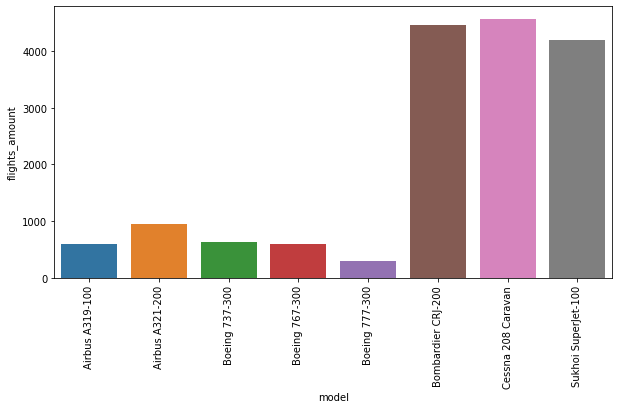

In [7]:
plt.figure(figsize=[10,5])
ax = sns.barplot(x="model", y="flights_amount", data=query_1)
plt.xticks(rotation=90)
plt.show()

Число перелотов на самолетах Borbardier, Cessna и Sukhoi на порядок выше, чем на других моделях самолетов. Эти модели самолетов
рассчитаны на небольшое число пассажиров и не очень далекие перелеты. Исходя из этих данных, можно выдвинуть гипотезу, что у компания F9
обеспечивает много перелетов между городами близко рассположенными друг к другу, поэтому у больших самолетов типо аирбасов и боингов рейсов в среднем меньше.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Графики отличные. Только стоило добавить графикам названия (здесь и ниже).
    
Да, лидируют самолеты небольшой вместимости, летающие на короткие расстояния.  
</div>

#### Города и количество рейсов

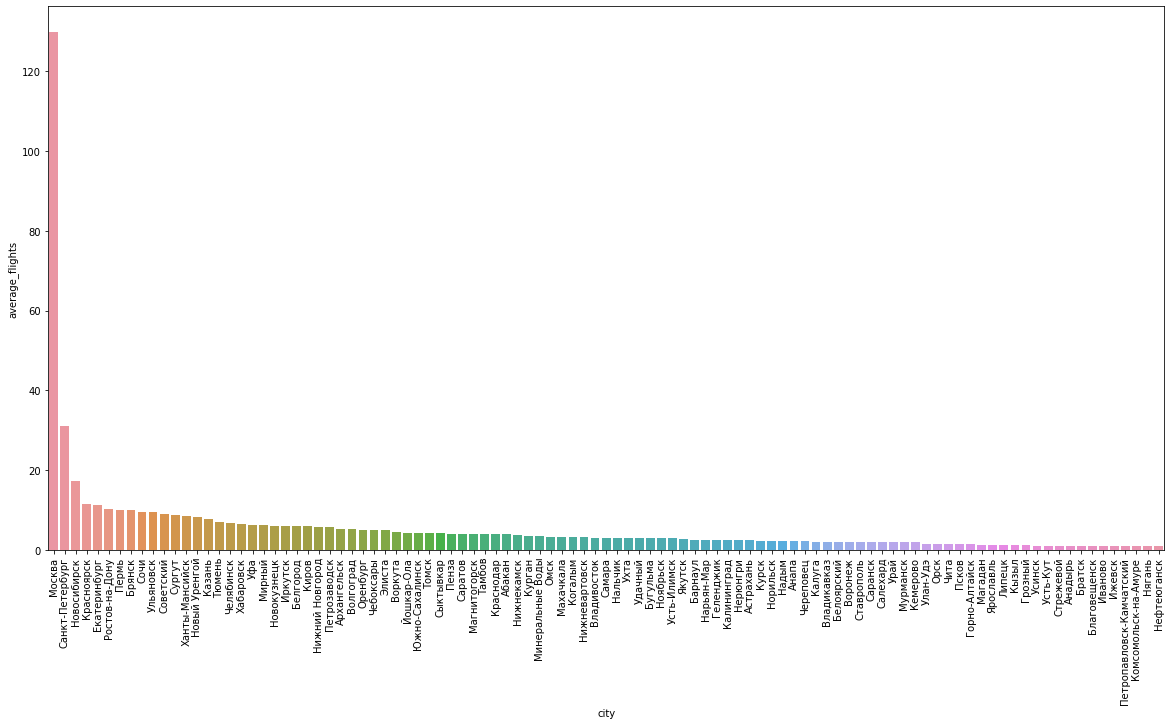

In [8]:
plt.figure(figsize=[20,10])
ax = sns.barplot(x="city", y="average_flights", data=query_3.sort_values(by = 'average_flights', ascending=False))
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Здесь можно было дополнительно построить график по всем городам, кроме Москвы и Санкт-Петербурга, чтобы детальнее их рассмотреть. 
</div>

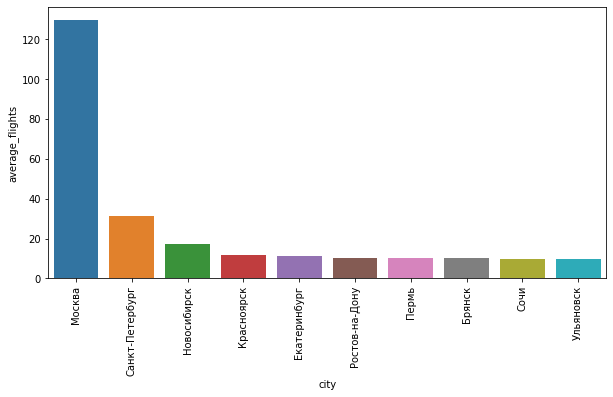

In [9]:
plt.figure(figsize=[10,5])
ax = sns.barplot(x="city", y="average_flights", data=query_3.sort_values(by = 'average_flights', ascending=False).head(10))
plt.xticks(rotation=90)
plt.show()

Наиболее популярным городом по среднему числу рейсов является Москва. Это объясняется тем, что Москва - столица и имеет наибольшую численность. В целом, данные по Санкт-Петербургу и Новосибирску тоже можно объяснить численностью их населения, числом аэропортов в городах и тем, что они могут быть пересадочными центрами для более дальных перелетов. Интересны наблюдения
по Перми, Брянску и Сочи, так как они не входят в топ 10 городов России по численности, но рейсов в них прибывающих все-равно много.
Если ситуацию с Сочи можно объяснить тем, что это курортный город. То Первмь и Брянск представляют интерес.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 

Большую часть топ-10 городов составляют города миллионники (Пермь в том числе). А вот как Брянск и Ульяновск попали в топ-10, действительно, загадка :) 
</div>

### Продажи билетов в недели фестивалей и нет

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера:</b> 
    
Прочитай внимательно условие: этого раздела там нет :)

Если бы он там был, то тебе следовало бы сформулировать нулевую и альтернативную гипотезы.
</div>

In [10]:
query_fest.head(3)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN


In [11]:
#Что-то не могу сообразить как можно сделать отдельный столбец, где бы была информация о наличии или отсутсвии фестиваля :(
#query_fest['be_fest'] = np.where(np.nan(query_fest['festival_name']), 'no_fest', 'fest')

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> 
Используй вместо np.nan(..) функцию pd.isnull(...).
</div>

In [12]:
fest= query_fest.dropna()
no_fest = query_fest.iloc[list(set(query_fest.index) - set(fest.index))]

In [13]:
results = st.ttest_ind(no_fest['ticket_amount'], fest['ticket_amount'])
print('p-значение:', results.pvalue)

p-значение: 0.09688869045922928


P-value больше 0,05, следовательно нельзя отвергнуть нулевую гипотезу о равенстве числа билетов в недели фестивалей и неделей, когда фестивалей не было. Значит наше предположение о том, что в недели фестивалей в Москве покупают больше авибилетов, неверно.

## Вывод

- После сформулированных SQL запросов был проведен анализ авиаперелетов компании F8. 
- Были выделены самые популярные модели самолетов и города, в которые чаще всего прилетают самолеты.
- Так же была проверена гипотеза о связи наличия фестивалей на неделе с количеством купленых билетов. 

<div style="border:solid green 2px; padding: 20px">
Настя, ты провела отличное исследование, молодец! 👍

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Файлы изучены
- [x]  Типы данных проверены на корректность
- [x]  Выбран топ-10 городов по количеству рейсов
- [x]  Построен график «Модели самолётов и количество рейсов»
- [x]  Построен график «Города и количество рейсов»
- [x]  Построен график «Топ-10 городов и количество рейсов»
- [x]  На каждом этапе написаны выводы
- [x]  Написан общий вывод